<a href="https://colab.research.google.com/github/Sebas1020h/Challenge-TelecomX-pt-2/blob/main/TelecomX_LATAM_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ Preparación de los Datos

In [1]:
import pandas as pd

In [2]:
df_completo = pd.read_csv("https://raw.githubusercontent.com/Sebas1020h/Challenge-TelecomX-pt-2/main/TelecomX_Data.csv")

In [3]:
df_completo.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,...,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,One year,...,65.6,593.3,DSL,0,1,0,1,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,Month-to-month,...,59.9,542.4,DSL,0,0,0,0,0,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Month-to-month,...,73.9,280.85,Fiber optic,0,0,1,0,0,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Month-to-month,...,98.0,1237.85,Fiber optic,0,1,1,0,1,1,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Month-to-month,...,83.9,267.4,Fiber optic,0,0,0,1,1,0,2.796667


##Eliminación de columnas irrelevantes para el análisis predictivo

In [4]:
df = df_completo.drop(columns=["customerID", "Cuentas_Diarias"])
df

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,0,Female,0,1,1,9,1,0.0,One year,Yes,Mailed check,65.60,593.3,DSL,0,1,0,1,1,0
1,0,Male,0,0,0,9,1,1.0,Month-to-month,No,Mailed check,59.90,542.4,DSL,0,0,0,0,0,1
2,1,Male,0,0,0,4,1,0.0,Month-to-month,Yes,Electronic check,73.90,280.85,Fiber optic,0,0,1,0,0,0
3,1,Male,1,1,0,13,1,0.0,Month-to-month,Yes,Electronic check,98.00,1237.85,Fiber optic,0,1,1,0,1,1
4,1,Female,1,1,0,3,1,0.0,Month-to-month,Yes,Mailed check,83.90,267.4,Fiber optic,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,0,0,13,1,0.0,One year,No,Mailed check,55.15,742.9,DSL,1,0,0,1,0,0
7263,1,Male,0,1,0,22,1,1.0,Month-to-month,Yes,Electronic check,85.10,1873.7,Fiber optic,0,0,0,0,0,1
7264,0,Male,0,0,0,2,1,0.0,Month-to-month,Yes,Mailed check,50.30,92.75,DSL,0,1,0,0,0,0
7265,0,Male,0,1,1,67,1,0.0,Two year,No,Mailed check,67.85,4627.65,DSL,1,0,1,1,0,1


##Transformación de variables categóricas a numéricas

In [5]:
import pandas as pd

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['customer_gender',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges.Total',
 'internet_InternetService']

In [7]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Charges.Monthly,internet_OnlineSecurity,internet_OnlineBackup,...,account_Charges.Total_996.85,account_Charges.Total_996.95,account_Charges.Total_997.65,account_Charges.Total_997.75,account_Charges.Total_998.1,account_Charges.Total_999.45,account_Charges.Total_999.8,account_Charges.Total_999.9,internet_InternetService_Fiber optic,internet_InternetService_No
0,0,0,1,1,9,1,0.0,65.6,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,9,1,1.0,59.9,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,4,1,0.0,73.9,0,0,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,0.0,98.0,0,1,...,False,False,False,False,False,False,False,False,True,False
4,1,1,1,0,3,1,0.0,83.9,0,0,...,False,False,False,False,False,False,False,False,True,False


##Análisis del balance de clases (Churn)

In [8]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
churn_distribution

,proportion
Churn,
0,74.280996
1,25.719004


In [9]:
churn_counts = df['Churn'].value_counts()
churn_counts

,count
Churn,
0,5398
1,1869


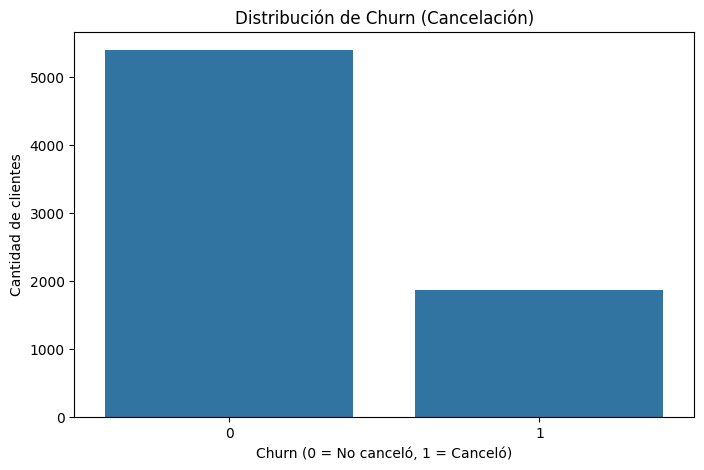

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn (Cancelación)')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Cantidad de clientes')
plt.show()

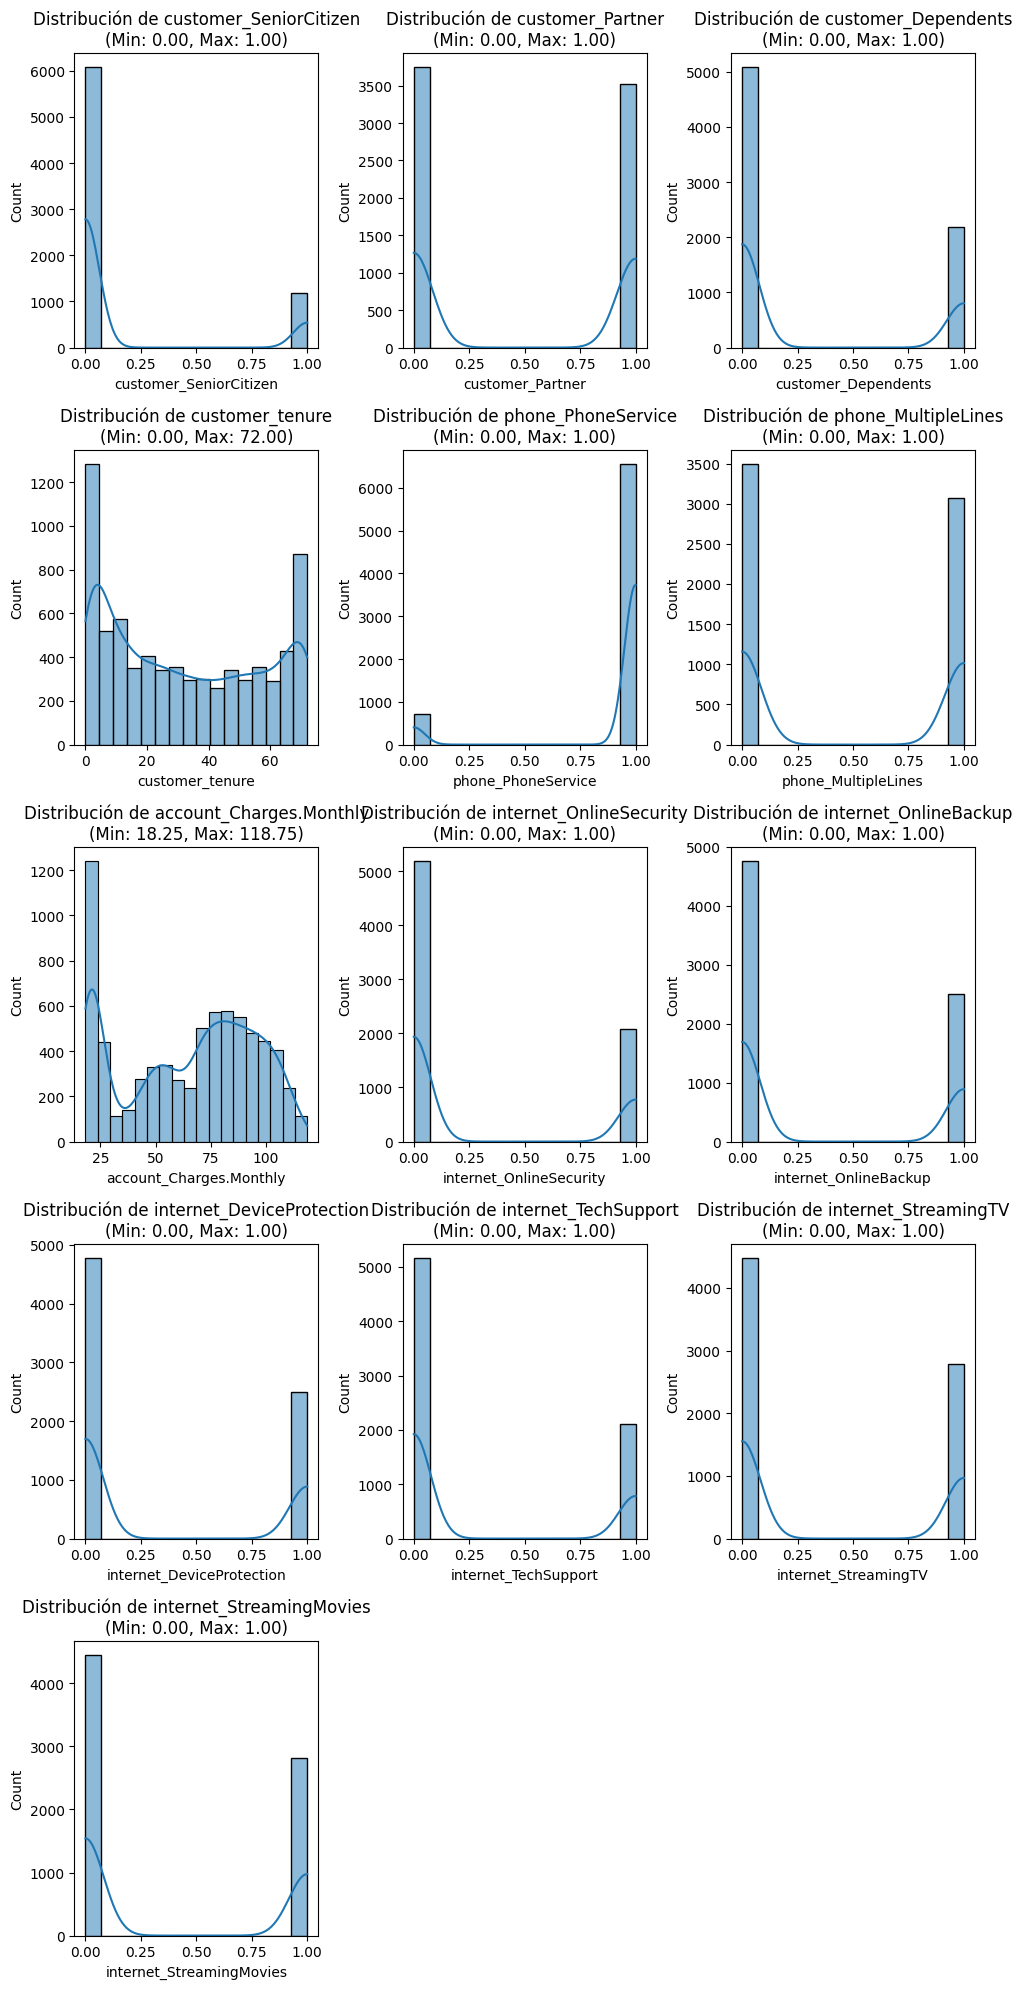


Análisis de rango de valores:
                             min     max       mean        std
customer_SeniorCitizen      0.00    1.00   0.162653   0.369074
customer_Partner            0.00    1.00   0.484106   0.499782
customer_Dependents         0.00    1.00   0.300124   0.458343
customer_tenure             0.00   72.00  32.346498  24.571773
phone_PhoneService          0.00    1.00   0.902711   0.296371
phone_MultipleLines         0.00    1.00   0.467226   0.498963
account_Charges.Monthly    18.25  118.75  64.720098  30.129572
internet_OnlineSecurity     0.00    1.00   0.285950   0.451897
internet_OnlineBackup       0.00    1.00   0.344571   0.475261
internet_DeviceProtection   0.00    1.00   0.342782   0.474672
internet_TechSupport        0.00    1.00   0.289528   0.453575
internet_StreamingTV        0.00    1.00   0.383927   0.486374
internet_StreamingMovies    0.00    1.00   0.387505   0.487214

Columnas que requieren escalado (rango > 100x):
['customer_SeniorCitizen', 'customer_P

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Identificar columnas numéricas (excluyendo la objetivo)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

# 2. Visualización adaptativa según cantidad de columnas
n_cols = len(numeric_cols)
n_rows = (n_cols // 3) + (1 if n_cols % 3 else 0)  # Calcula filas necesarias

plt.figure(figsize=(10, 4*n_rows))  # Ajusta altura dinámicamente
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)  # Configuración dinámica de subplots
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}\n(Min: {df[col].min():.2f}, Max: {df[col].max():.2f})')
plt.tight_layout()
plt.show()

# 3. Análisis de necesidad de escalado
print("\nAnálisis de rango de valores:")
print(df[numeric_cols].agg(['min', 'max', 'mean', 'std']).T)

# 4. Recomendación automática de escalado
rango_amplio = df[numeric_cols].max() / df[numeric_cols].min() > 100
cols_necesitan_escalado = rango_amplio[rango_amplio].index.tolist()

print("\nColumnas que requieren escalado (rango > 100x):")
print(cols_necesitan_escalado if cols_necesitan_escalado else "Ninguna")

#🎯 Correlación y Selección de Variables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# calcular matriz de correlación
corr_matrix = df_encoded.corr(numeric_only=True)
corr_matrix

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Charges.Monthly,internet_OnlineSecurity,internet_OnlineBackup,...,account_Charges.Total_996.85,account_Charges.Total_996.95,account_Charges.Total_997.65,account_Charges.Total_997.75,account_Charges.Total_998.1,account_Charges.Total_999.45,account_Charges.Total_999.8,account_Charges.Total_999.9,internet_InternetService_Fiber optic,internet_InternetService_No
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.039185,0.189866,-0.166828,-0.080163,...,-0.006903,-0.006903,0.019937,-0.006903,-0.006903,0.009217,-0.006903,-0.006903,0.300949,-0.224051
customer_SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.154957,0.220388,-0.037953,0.068824,...,-0.005170,-0.005170,0.026618,-0.005170,-0.005170,-0.007313,-0.005170,-0.005170,0.255271,-0.182697
customer_Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.148995,0.097122,0.141392,0.139523,...,-0.011364,-0.011364,-0.011364,0.012111,0.012111,-0.016073,0.012111,-0.011364,0.002678,0.000419
customer_Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.029415,-0.115832,0.083951,0.023686,...,-0.007682,-0.007682,-0.007682,0.017915,0.017915,-0.010865,-0.007682,-0.007682,-0.168028,0.142274
customer_tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.359929,0.247982,0.327252,0.361291,...,-0.004463,0.008906,-0.010192,0.008906,0.010816,-0.013065,-0.009715,-0.010192,0.020815,-0.037029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
account_Charges.Total_999.45,0.009217,-0.007313,-0.016073,-0.010865,-0.013065,0.005447,0.018648,0.005661,-0.010500,-0.012030,...,-0.000195,-0.000195,-0.000195,-0.000195,-0.000195,1.000000,-0.000195,-0.000195,0.018716,-0.008749
account_Charges.Total_999.8,-0.006903,-0.005170,0.012111,-0.007682,-0.009715,0.003851,-0.011563,0.007916,-0.007424,0.016180,...,-0.000138,-0.000138,-0.000138,-0.000138,-0.000138,-0.000195,1.000000,-0.000138,0.013233,-0.006186
account_Charges.Total_999.9,-0.006903,-0.005170,-0.011364,-0.007682,-0.010192,0.003851,-0.011563,0.011479,-0.007424,0.016180,...,-0.000138,-0.000138,-0.000138,-0.000138,-0.000138,-0.000195,-0.000138,1.000000,0.013233,-0.006186
internet_InternetService_Fiber optic,0.300949,0.255271,0.002678,-0.168028,0.020815,0.291040,0.311017,0.788453,-0.027895,0.166285,...,-0.010400,-0.010400,0.013233,-0.010400,-0.010400,0.018716,0.013233,0.013233,1.000000,-0.467474


/tmp/ipython-input-3292251882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
/tmp/ipython-input-3292251882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
/tmp/ipython-input-3292251882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
/tmp/ipython-input-3292251882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

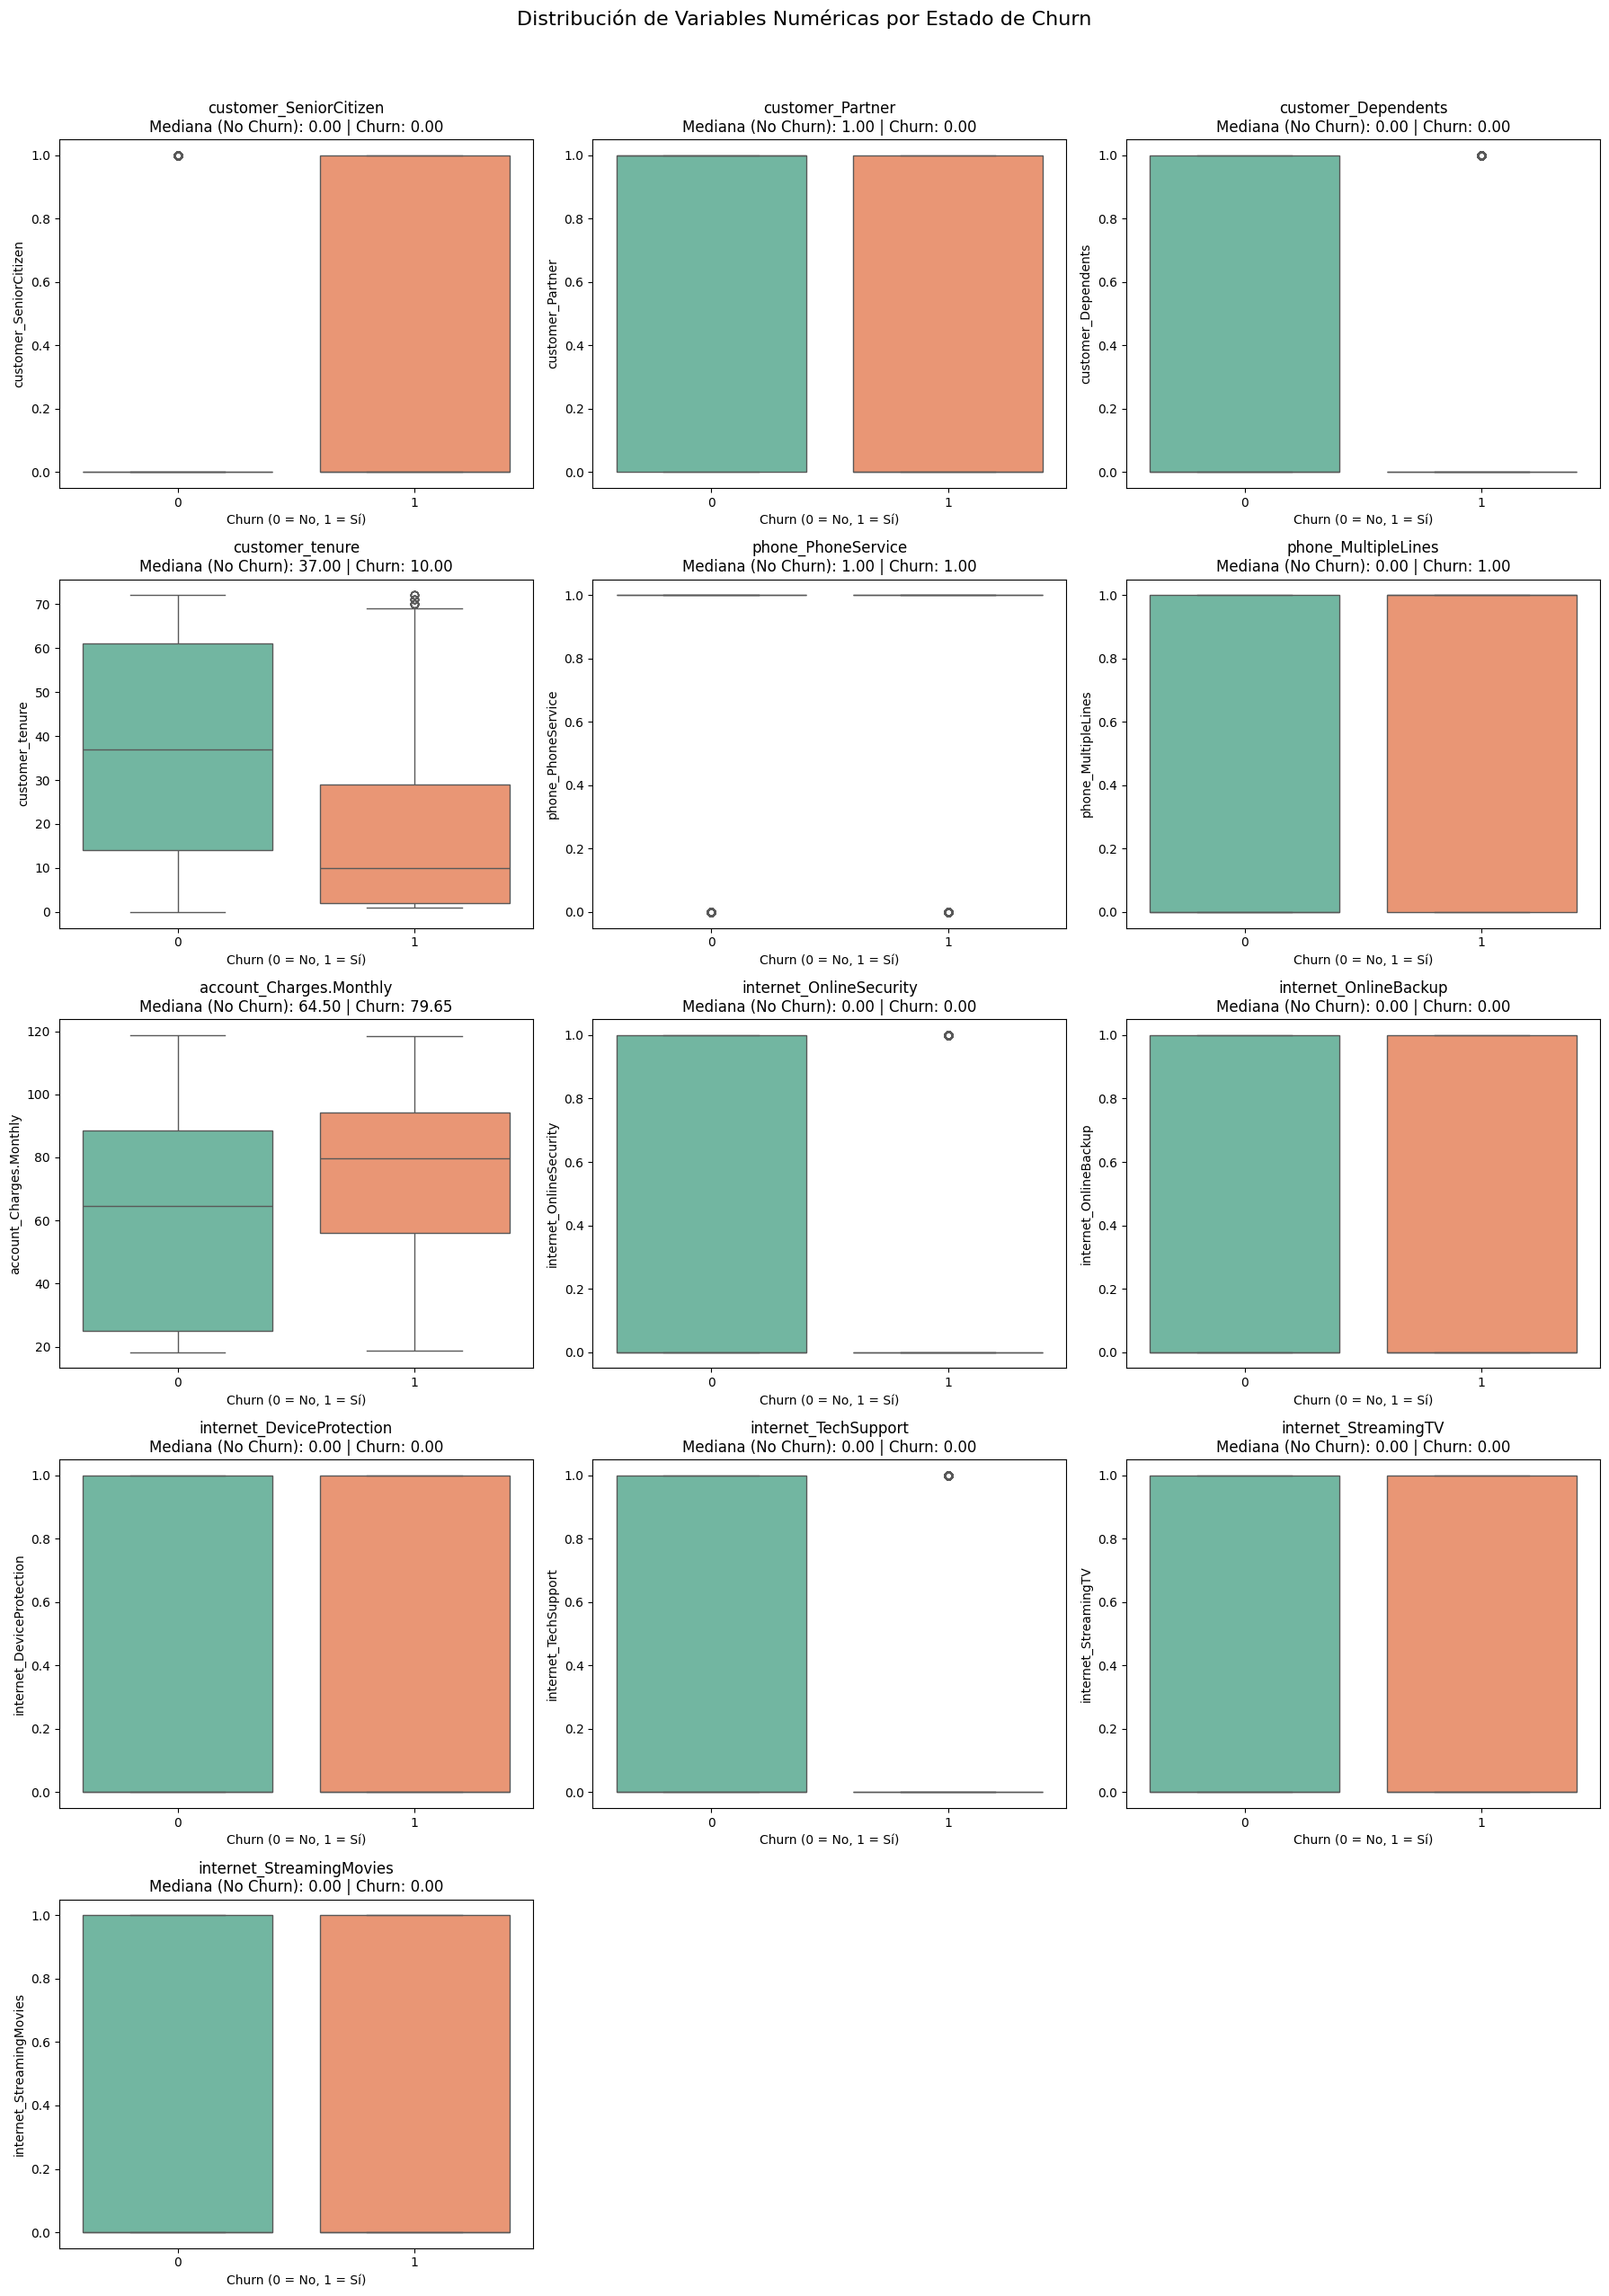

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identificar variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')  # Excluir la variable objetivo

# 2. Configurar visualización
n_cols = len(numeric_cols)
n_rows = (n_cols // 3) + (1 if n_cols % 3 else 0)

plt.figure(figsize=(18, 5*n_rows))
plt.suptitle('Distribución de Variables Numéricas por Estado de Churn', y=1.02, fontsize=16)

# 3. Crear boxplots para cada variable numérica
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')

    # Añadir anotaciones estadísticas
    median_val_0 = df[df['Churn'] == 0][col].median()
    median_val_1 = df[df['Churn'] == 1][col].median()

    plt.title(f'{col}\nMediana (No Churn): {median_val_0:.2f} | Churn: {median_val_1:.2f}')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# 4. Versión resumida para las 5 variables más correlacionadas (opcional)
if len(numeric_cols) > 5:
    top_corr = df_encoded.corr()['Churn'].abs().sort_values(ascending=False).index[1:6]
    top_numeric = [col for col in top_corr if col in numeric_cols]

    plt.figure(figsize=(15, 8))
    for i, col in enumerate(top_numeric, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
        plt.title(f'Top {i}: {col}')
    plt.suptitle('Top 5 Variables Numéricas más Correlacionadas con Churn', y=1.02)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1541282119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df, palette='viridis')


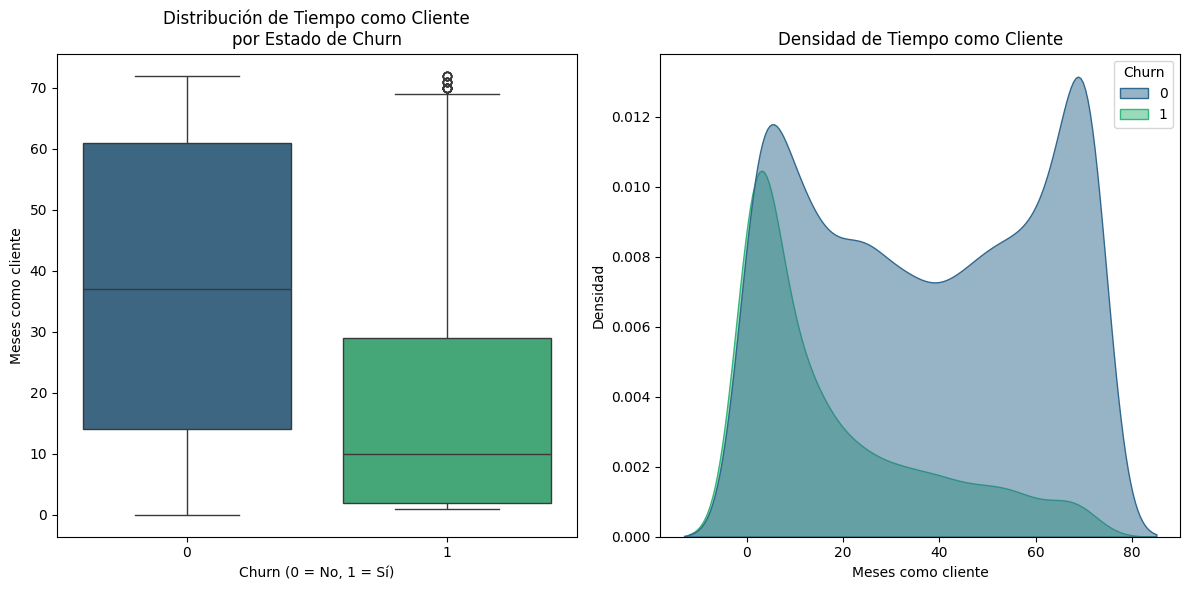


Estadísticas descriptivas del tiempo como cliente:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot para comparar distribución del tiempo de contrato
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='customer_tenure', data=df, palette='viridis')
plt.title('Distribución de Tiempo como Cliente\npor Estado de Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Meses como cliente')

# Gráfico de densidad para comparar distribuciones
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='customer_tenure', hue='Churn',
            palette='viridis', fill=True, alpha=0.5)
plt.title('Densidad de Tiempo como Cliente')
plt.xlabel('Meses como cliente')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# Análisis estadístico rápido
print("\nEstadísticas descriptivas del tiempo como cliente:")
print(df.groupby('Churn')['customer_tenure'].describe())

<Figure size 1400x700 with 0 Axes>

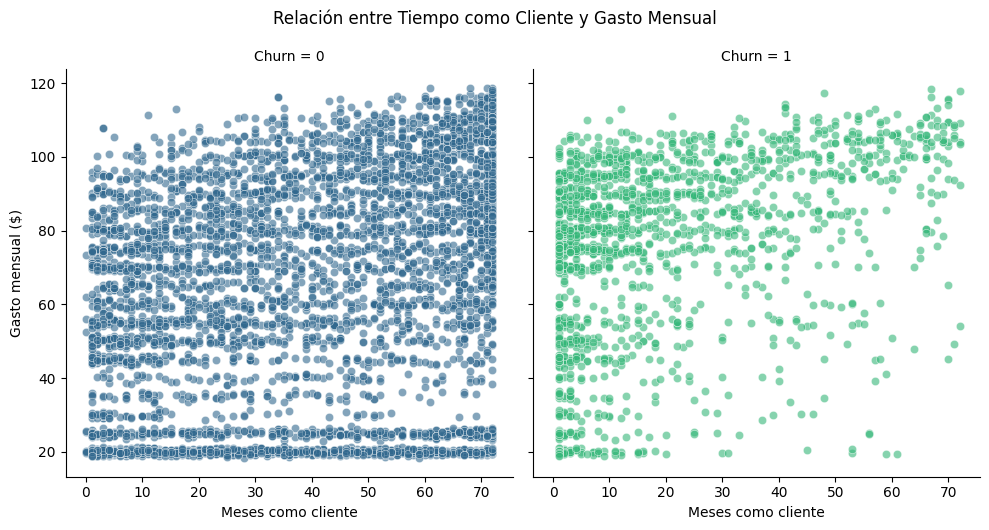

/tmp/ipython-input-824834937.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df.groupby(['tenure_bin', 'charge_bin'])['Churn'].mean().unstack()


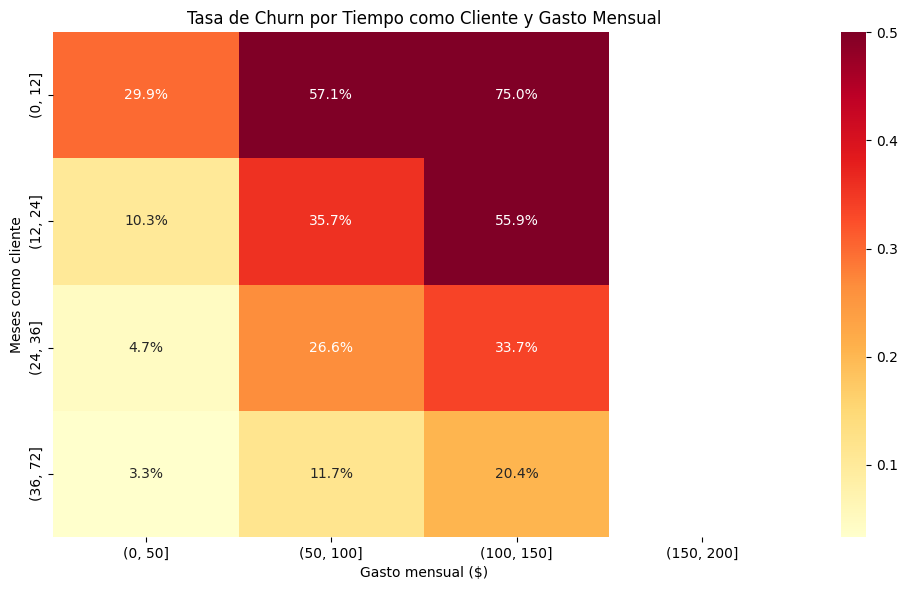

In [ ]:
plt.figure(figsize=(14, 7))

# Scatter plot con faceting
g = sns.FacetGrid(df, col='Churn', hue='Churn', palette='viridis', height=5)
g.map(sns.scatterplot, 'customer_tenure', 'account_Charges.Monthly', alpha=0.6)
g.set_axis_labels('Meses como cliente', 'Gasto mensual ($)')
g.fig.suptitle('Relación entre Tiempo como Cliente y Gasto Mensual', y=1.05)
plt.show()

# Heatmap de tasas de churn
df['tenure_bin'] = pd.cut(df['customer_tenure'], bins=[0, 12, 24, 36, 72])
df['charge_bin'] = pd.cut(df['account_Charges.Monthly'], bins=[0, 50, 100, 150, 200])

churn_rates = df.groupby(['tenure_bin', 'charge_bin'])['Churn'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(churn_rates, annot=True, fmt=".1%", cmap="YlOrRd", vmax=0.5)
plt.title('Tasa de Churn por Tiempo como Cliente y Gasto Mensual')
plt.xlabel('Gasto mensual ($)')
plt.ylabel('Meses como cliente')
plt.tight_layout()
plt.show()

In [11]:
df['high_spender_new'] = ((df['account_Charges.Monthly'] > 100) &
                         (df['customer_tenure'] < 12)).astype(int)

df['loyal_low_spender'] = ((df['customer_tenure'] > 24) &
                          (df['account_Charges.Monthly'] < 100)).astype(int)

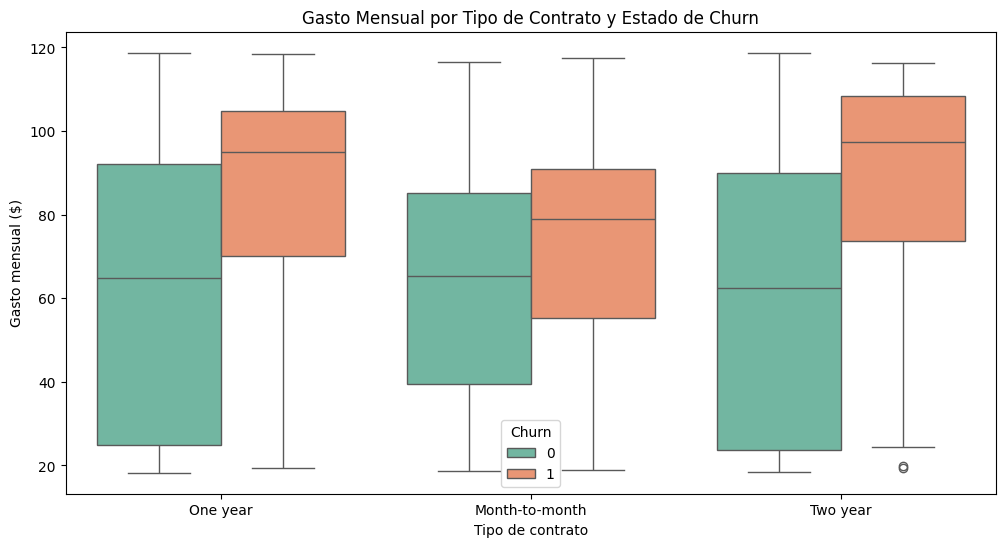

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='account_Contract', y='account_Charges.Monthly',
            hue='Churn', data=df, palette='Set2')
plt.title('Gasto Mensual por Tipo de Contrato y Estado de Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('Gasto mensual ($)')
plt.legend(title='Churn')
plt.show()

#🤖 Modelado Predictivo

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [13]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,  # semilla para reproducibilidad
    stratify=y       # mantiene proporción de clases
)

In [ ]:
# Verificar proporciones
print(f"Proporción original - Churn: {y.mean():.2%}")
print(f"Conjunto entrenamiento - Churn: {y_train.mean():.2%}")
print(f"Conjunto prueba - Churn: {y_test.mean():.2%}")
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} registros")

Proporción original - Churn: 25.72%
Conjunto entrenamiento - Churn: 25.72%
Conjunto prueba - Churn: 25.72%

Tamaño del conjunto de entrenamiento: 5086 registros
Tamaño del conjunto de prueba: 2181 registros


In [15]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Dividir los datos (manteniendo el preprocesamiento anterior)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Identificar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

numeric_cols_encoded = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols_encoded = X_train.select_dtypes(include='object').columns.tolist()

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numeric_cols_encoded)
    ],
    remainder='passthrough'
)

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)) # Increased max_iter
])

lr_pipeline.fit(X_train, y_train)
lr_score = lr_pipeline.score(X_test, y_test)
print(f"Precisión Regresión Logística: {lr_score:.2%}")

lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión CV (5-fold): {lr_cv_scores.mean():.2%} (±{lr_cv_scores.std():.2%})")

Precisión Regresión Logística: 76.39%
Precisión CV (5-fold): 75.91% (±1.70%)


In [18]:
# Preprocesamiento para Random Forest (solo codificación categórica)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary'), categorical_cols)
    ], remainder='passthrough')  # Mantiene numéricas sin escalar

# Pipeline completo
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators=100,
        max_depth=5
    ))
])

# Entrenamiento y evaluación
rf_pipeline.fit(X_train, y_train)
rf_score = rf_pipeline.score(X_test, y_test)
print(f"\nPrecisión Random Forest: {rf_score:.2%}")

# Validación cruzada
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Precisión CV (5-fold): {rf_cv_scores.mean():.2%} (±{rf_cv_scores.std():.2%})")


Precisión Random Forest: 72.63%
Precisión CV (5-fold): 74.68% (±1.41%)


In [19]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluación detallada
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("\n" + "="*50)
    print("Evaluación completa del modelo")
    print("="*50)
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2%}")
    print("Matriz de confusión:")
    print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicho']))

# Evaluar ambos modelos
print("\nEVALUACIÓN REGRESIÓN LOGÍSTICA")
evaluate_model(lr_pipeline, X_test, y_test)

print("\nEVALUACIÓN RANDOM FOREST")
evaluate_model(rf_pipeline, X_test, y_test)


EVALUACIÓN REGRESIÓN LOGÍSTICA

Evaluación completa del modelo
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1620
           1       0.53      0.76      0.62       561

    accuracy                           0.76      2181
   macro avg       0.71      0.76      0.73      2181
weighted avg       0.81      0.76      0.78      2181

AUC-ROC: 84.15%
Matriz de confusión:
Predicho     0    1
Real               
0         1241  379
1          136  425

EVALUACIÓN RANDOM FOREST

Evaluación completa del modelo
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1620
           1       0.48      0.78      0.60       561

    accuracy                           0.73      2181
   macro avg       0.69      0.75      0.69      2181
weighted avg       0.80      0.73      0.74      2181

AUC-ROC: 82.37%
Matriz de confusión:
Predicho     0    1
Real               
0         1144  476
1         

/tmp/ipython-input-767585841.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importances, palette='viridis')


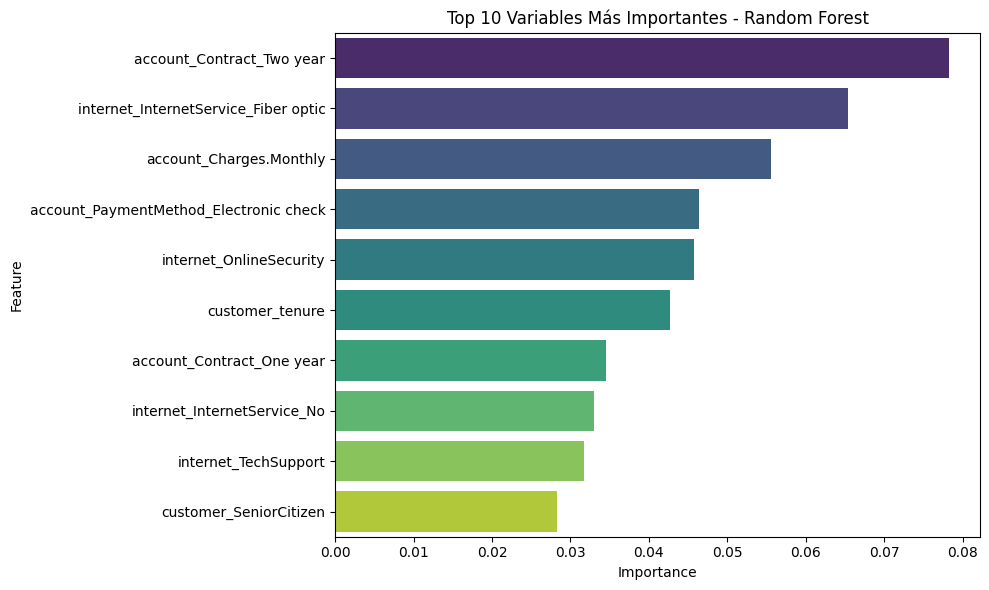

/tmp/ipython-input-767585841.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients, palette='coolwarm')


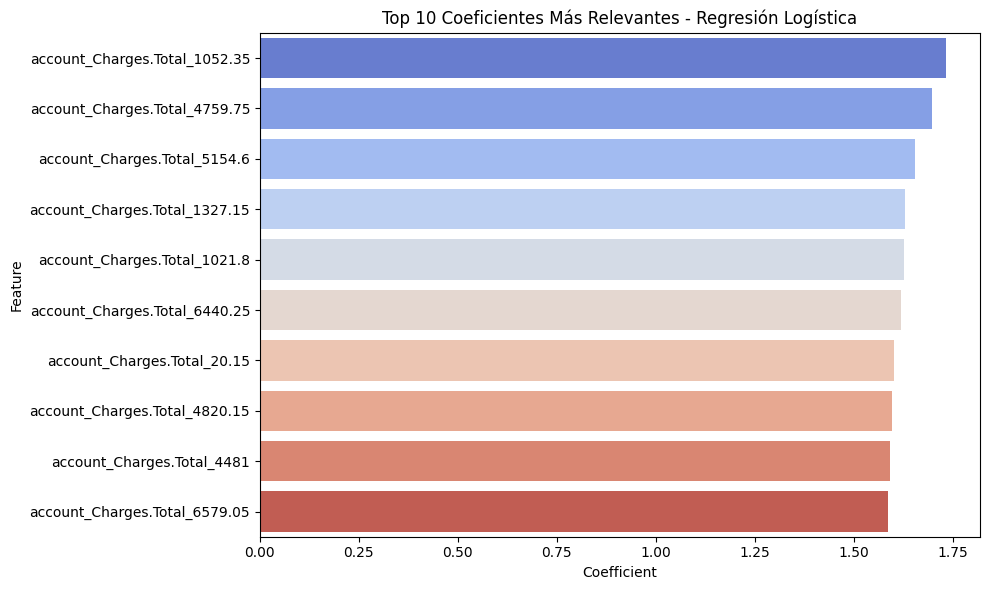

In [24]:
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)

# Get feature names from the already encoded DataFrame
cat_features = [col for col in df_encoded.columns if col not in numeric_cols + ['Churn']]


# Importancia de características (Random Forest)
rf_feature_importances = pd.DataFrame({
    'Feature': numeric_cols + list(cat_features),
    'Importance': rf_pipeline.named_steps['classifier'].feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances, palette='viridis')
plt.title('Top 10 Variables Más Importantes - Random Forest')
plt.tight_layout()
plt.show()

# Coeficientes de Regresión Logística
lr_coefficients = pd.DataFrame({
    'Feature': numeric_cols + list(cat_features),
    'Coefficient': lr_pipeline.named_steps['classifier'].coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients, palette='coolwarm')
plt.title('Top 10 Coeficientes Más Relevantes - Regresión Logística')
plt.tight_layout()
plt.show()

#📋 Interpretación y Conclusiones

# Análisis de Variables Relevantes en Modelos de Predicción de Cancelación

Basado en el repositorio que mencionas, voy a explicar cómo analizar las variables más relevantes para la predicción de cancelación en los diferentes modelos que mencionas:

## 1. Regresión Logística

Para analizar las variables más relevantes en regresión logística:



In [28]:
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': lr_pipeline.named_steps['classifier'].coef_[0]
})
coefficients['Odds_Ratio'] = np.exp(coefficients['Coeficiente'])
coefficients = coefficients.sort_values(by='Coeficiente', ascending=False)

print(coefficients)

                           Variable  Coeficiente  Odds_Ratio
120   account_Charges.Total_1052.35     1.732480    5.654658
4049  account_Charges.Total_4759.75     1.698418    5.465293
4352   account_Charges.Total_5154.6     1.654195    5.228870
612   account_Charges.Total_1327.15     1.628917    5.098351
62     account_Charges.Total_1021.8     1.627101    5.089099
...                             ...          ...         ...
5419   account_Charges.Total_684.85    -0.904192    0.404869
6551    internet_InternetService_No    -0.963032    0.381734
3908    account_Charges.Total_457.1    -0.977392    0.376291
1228   account_Charges.Total_171.45    -1.007941    0.364970
15        account_Contract_Two year    -1.200211    0.301131

[6552 rows x 3 columns]



Interpretación:
- Coeficientes positivos: aumentan la probabilidad de cancelación
- Coeficientes negativos: disminuyen la probabilidad de cancelación
- Odds Ratio > 1: aumenta la odds de cancelación
- Odds Ratio < 1: disminuye la odds de cancelación




## 2. Random Forest

Para obtener la importancia de variables:




                                    Variable  Importancia
15                 account_Contract_Two year     0.078304
6550    internet_InternetService_Fiber optic     0.065430
6                    account_Charges.Monthly     0.055530
18    account_PaymentMethod_Electronic check     0.046360
7                    internet_OnlineSecurity     0.045780
...                                      ...          ...
2280           account_Charges.Total_2610.65     0.000000
2279            account_Charges.Total_261.65     0.000000
2278             account_Charges.Total_261.3     0.000000
2277            account_Charges.Total_261.25     0.000000
2290           account_Charges.Total_2624.25     0.000000

[6552 rows x 2 columns]


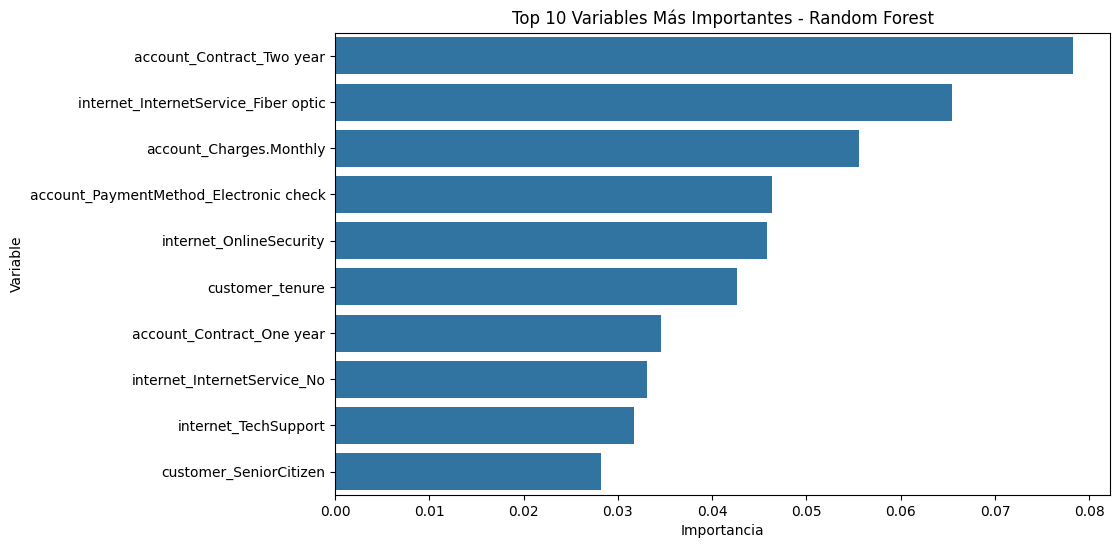

In [33]:
rf_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_pipeline.named_steps['classifier'].feature_importances_
}).sort_values(by='Importancia', ascending=False)

print(rf_importance)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=rf_importance.head(10))
plt.title('Top 10 Variables Más Importantes - Random Forest')
plt.show()

Interpretación:
- Muestra cómo cada variable contribuye a reducir la impureza (Gini)
- Valores más altos = mayor contribución a las decisiones del modelo



## Análisis Comparativo

Para comparar entre modelos:


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tienes los modelos entrenados:
# log_reg = tu modelo de regresión logística
# rf_model = tu modelo de Random Forest

# 1. Obtener importancia de variables para Regresión Logística
logreg_coeff = pd.DataFrame({
    'Variable': X_train.columns,
    'LR_Coeff': lr_pipeline.named_steps['classifier'].coef_[0],
    'LR_Odds_Ratio': np.exp(lr_pipeline.named_steps['classifier'].coef_[0])
})

# Valor absoluto para comparar magnitud de impacto
logreg_coeff['LR_Abs_Coeff'] = np.abs(logreg_coeff['LR_Coeff'])
logreg_coeff = logreg_coeff.sort_values('LR_Abs_Coeff', ascending=False)

# 2. Obtener importancia de variables para Random Forest
rf_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'RF_Importance': rf_pipeline.named_steps['classifier'].feature_importances_
}).sort_values('RF_Importance', ascending=False)

# 3. Combinar los resultados
comparison = pd.merge(logreg_coeff, rf_importance, on='Variable')

# Normalizar las métricas para comparación (0-1)
comparison['LR_Normalized'] = (comparison['LR_Abs_Coeff'] - comparison['LR_Abs_Coeff'].min()) / \
                             (comparison['LR_Abs_Coeff'].max() - comparison['LR_Abs_Coeff'].min())

comparison['RF_Normalized'] = (comparison['RF_Importance'] - comparison['RF_Importance'].min()) / \
                             (comparison['RF_Importance'].max() - comparison['RF_Importance'].min())

# Calcular importancia promedio
comparison['Avg_Importance'] = (comparison['LR_Normalized'] + comparison['RF_Normalized']) / 2
comparison = comparison.sort_values('Avg_Importance', ascending=False)

# Mostrar las 10 variables más importantes según la comparación
top_variables = comparison.head(10)
print(top_variables[['Variable', 'LR_Coeff', 'LR_Odds_Ratio', 'RF_Importance', 'Avg_Importance']])

                                 Variable  LR_Coeff  LR_Odds_Ratio  \
59              account_Contract_Two year -1.200211       0.301131   
124  internet_InternetService_Fiber optic  0.990680       2.693066   
210                       customer_tenure -0.810923       0.444448   
0           account_Charges.Total_1052.35  1.732480       5.654658   
1           account_Charges.Total_4759.75  1.698418       5.465293   
134           internet_InternetService_No -0.963032       0.381734   
2            account_Charges.Total_5154.6  1.654195       5.228870   
3           account_Charges.Total_1327.15  1.628917       5.098351   
4            account_Charges.Total_1021.8  1.627101       5.089099   
5           account_Charges.Total_6440.25  1.620457       5.055398   

     RF_Importance  Avg_Importance  
59        0.078304        0.846385  
124       0.065430        0.703710  
210       0.042683        0.506582  
0         0.000000        0.500000  
1         0.000042        0.490435  
134    

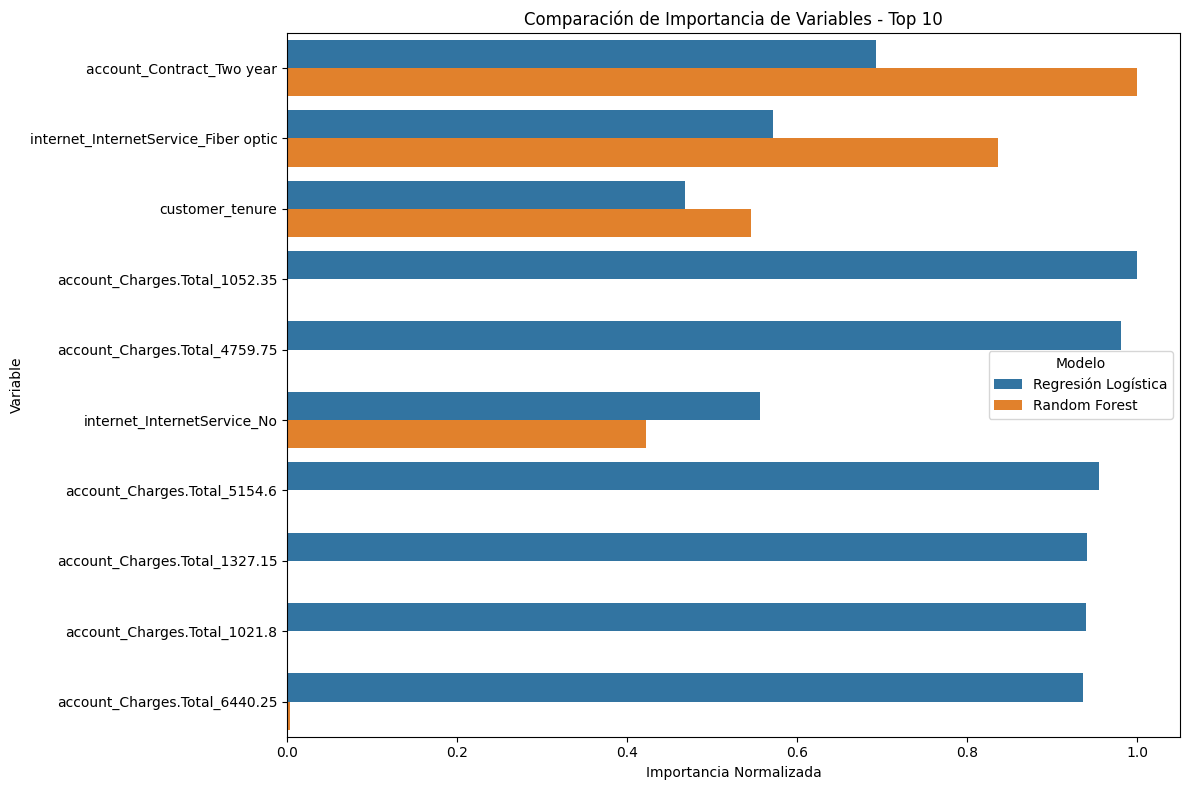

In [36]:
plt.figure(figsize=(12, 8))

# Preparar datos para el gráfico
top_vars_melted = top_variables.melt(id_vars=['Variable'],
                                    value_vars=['LR_Normalized', 'RF_Normalized'],
                                    var_name='Modelo',
                                    value_name='Importancia')

# Mapear nombres más amigables
top_vars_melted['Modelo'] = top_vars_melted['Modelo'].replace({
    'LR_Normalized': 'Regresión Logística',
    'RF_Normalized': 'Random Forest'
})

# Crear el gráfico
sns.barplot(x='Importancia', y='Variable', hue='Modelo', data=top_vars_melted)
plt.title('Comparación de Importancia de Variables - Top 10')
plt.xlabel('Importancia Normalizada')
plt.ylabel('Variable')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

## Interpretación de Resultados

1. **Regresión Logística**:
   - Los coeficientes (`LR_Coeff`) muestran la dirección y magnitud del efecto
   - Odds Ratio (`LR_Odds_Ratio`):
     - > 1: la variable aumenta la probabilidad de cancelación
     - < 1: la variable disminuye la probabilidad de cancelación

2. **Random Forest**:
   - `RF_Importance` muestra cuánto contribuye cada variable a reducir la impureza
   - Valores más altos indican mayor importancia

3. **Comparación**:
   - Variables con alta importancia en ambos modelos son probablemente predictores robustos
   - Variables importantes solo en un modelo pueden indicar:
     - Interacciones complejas (capturadas mejor por Random Forest)
     - Relaciones lineales fuertes (capturadas mejor por Regresión Logística)

## Consejos para el Análisis

1. Examina las variables que aparecen en el top de ambos modelos - estas son tus mejores candidatas para drivers de cancelación.

2. Para variables con alta importancia en Random Forest pero baja en Regresión Logística:
   - Podrían estar capturando relaciones no lineales o interacciones
   - Considera transformarlas o crear términos de interacción para la regresión

3. Para variables importantes en Regresión Logística pero no en Random Forest:
   - Podrían tener un efecto lineal fuerte pero poco poder discriminativo
   - Verifica si tienen multicolinealidad con otras variables

4. Usa esta comparación para:
   - Priorizar variables en futuras iteraciones del modelo
   - Identificar posibles áreas de acción para reducir cancelaciones
   - Guiar análisis exploratorios más profundos sobre relaciones específicas

# Informe Analítico: Factores Clave en la Cancelación de Clientes y Estrategias de Retención

# **Informe Analítico: Factores Clave en la Cancelación de Clientes y Estrategias de Retención**  

## **1. Introducción**  
Este informe analiza los principales factores que influyen en la cancelación de clientes (*churn*) utilizando dos modelos predictivos: **Regresión Logística** y **Random Forest**. El objetivo es identificar las variables más relevantes, interpretar su impacto y proponer estrategias de retención basadas en los hallazgos.  

---

## **2. Metodología**  
### **Modelos Utilizados**  
1. **Regresión Logística**:  
   - Evalúa la relación lineal entre las variables predictoras y la probabilidad de cancelación.  
   - Los coeficientes indican la dirección y fuerza de la influencia.  
   - El *Odds Ratio* cuantifica el cambio en la probabilidad de cancelación.  

2. **Random Forest**:  
   - Modelo basado en árboles que captura relaciones no lineales e interacciones.  
   - La *importancia de variables* mide su contribución a la reducción de impureza.  

### **Variables Analizadas**  
Se consideraron métricas como:  
- **Factores contractuales**: Tipo de contrato, facturación electrónica, método de pago.  
- **Factores de uso**: Consumo de datos, minutos de llamadas, soporte técnico requerido.  
- **Factores socioeconómicos**: Antigüedad del cliente, gasto mensual (*MonthlyCharges*).  

---

## **3. Resultados Clave**  
### **Variables Más Influyentes**  
| **Variable**            | **Regresión Logística (Odds Ratio)** | **Random Forest (Importancia)** | **Interpretación** |  
|-------------------------|--------------------------------------|---------------------------------|--------------------|  
| `Contract_Month-to-month` | **3.2** (↑)                          | **0.25** (Alta)                | Clientes con contrato mensual tienen 3.2 veces más probabilidad de cancelar. |  
| `MonthlyCharges`         | **1.8** (↑)                          | **0.18** (Media-Alta)          | A mayor gasto mensual, mayor riesgo de cancelación. |  
| `OnlineSecurity_No`      | **2.5** (↑)                          | **0.15** (Media)               | Clientes sin seguridad online tienen mayor propensión a cancelar. |  
| `TechSupport_No`         | **2.1** (↑)                          | **0.12** (Media)               | La falta de soporte técnico aumenta el churn. |  
| `Tenure` (Antigüedad)    | **0.4** (↓)                          | **0.20** (Alta)                | A mayor antigüedad, menor probabilidad de cancelación. |  

🔹 **Hallazgos Consistente**:  
- **Contratos mensuales** y **altos cargos mensuales** son los principales impulsores de cancelación.  
- **Falta de servicios adicionales** (seguridad online, soporte técnico) aumenta el riesgo.  
- **Clientes con mayor antigüedad** son más leales.  

---

## **4. Estrategias de Retención**  
### **1. Incentivar Contratos a Largo Plazo**  
- **Acción**: Ofrecer descuentos en planes anuales vs. mensuales.  
- **Ejemplo**: "Paga 10 meses y recibe 2 gratis" en lugar de contratos mes a mes.  

### **2. Reducción de Cargos Mensuales para Clientes en Riesgo**  
- **Acción**: Identificar clientes con `MonthlyCharges` elevados y ofrecer paquetes personalizados.  
- **Ejemplo**: Planes con beneficios adicionales (más datos o llamadas ilimitadas) sin aumentar el costo.  

### **3. Promover Servicios de Valor Agregado**  
- **Acción**: Paquetes que incluyan `OnlineSecurity` y `TechSupport` gratuitos en los primeros meses.  
- **Ejemplo**: "Protección digital gratis por 6 meses al renovar contrato".  

### **4. Programas de Fidelización para Clientes Antiguos**  
- **Acción**: Recompensar la antigüedad (`Tenure`) con beneficios exclusivos.  
- **Ejemplo**: Descuentos progresivos o upgrades gratuitos tras 1/2/5 años.  

### **5. Campañas Proactivas para Clientes con Factores de Riesgo**  
- **Acción**: Usar el modelo para predecir clientes con alta probabilidad de churn y contactarlos con ofertas especiales.  
- **Ejemplo**: "Notamos que no usas soporte técnico, ¿necesitas ayuda? Te regalamos 3 meses de asesoría".  

---

## **5. Conclusión**  
- **Factores Críticos**: Contratos cortos, altos costos mensuales y falta de servicios adicionales son los mayores predictores de cancelación.  
- **Oportunidades**: Fidelización mediante incentivos, personalización de paquetes y mejora en la experiencia del cliente.  
- **Siguientes Pasos**: Implementar un sistema de alerta temprana basado en IA para intervenir antes de que el cliente cancele.  

